In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import FormatStrFormatter
from mainscript import OnesidedCoupling

# Timeseries

Duffing

In [ ]:
with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()

t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)
x = 1
y = 0
p = 1
q = 1.5
par = x,y,p,q
k = 0.1
gamma = 0.1
mu = 2
beta = 0.2
alpha = 0.5
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)


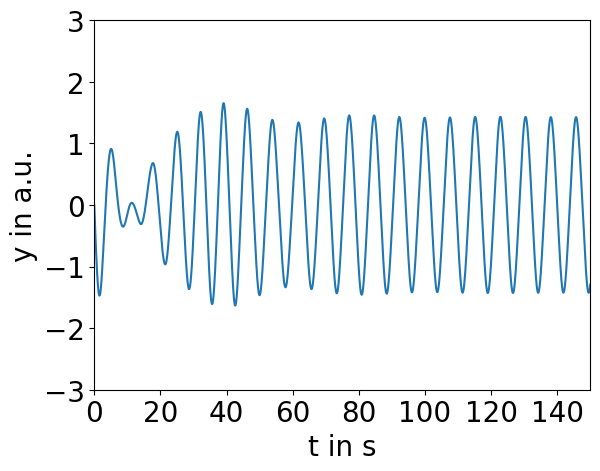

In [45]:
xsol = lilie.x_solv()
ysol = lilie.y_solv()
psol = lilie.p_solv()
qsol = lilie.q_solv()

plt.plot(t, ysol, label = f"k: {k:.2f}")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
# plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in s", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([-3, 3])
plt.xlim([0,150])
# plt.savefig(path + "y_timeseries_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

# Phase plane

Duffing

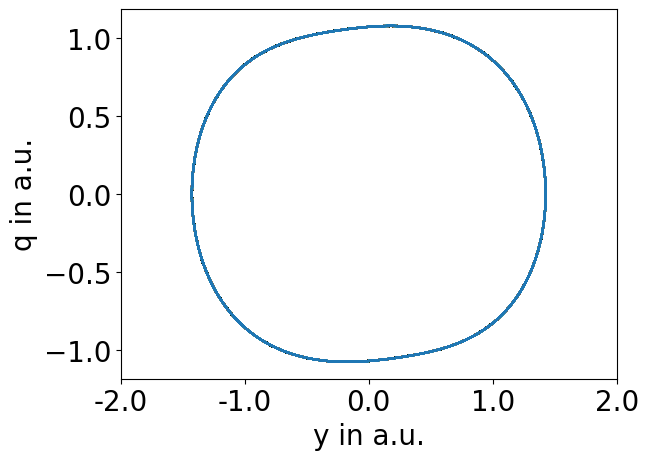

In [34]:
with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()

t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)

par_big = 1,0,1,-1.5
k = 0.1
gamma = 0.1
mu = 2
beta = 0.2
alpha = 0.5
p = np.arange(-3,3,0.2)
u = np.repeat(1, len(p))

lilie_big = OnesidedCoupling(par_big, t, keep, k, mu, gamma, alpha, beta)
for i in u:
  for z in p:
    par_small = i,z,i,i
    lilie_small = OnesidedCoupling(par_small, t, keep, k, mu, gamma, alpha, beta)
    plt.plot(lilie_small.y_solv()[-keep:],lilie_small.q_solv()[-keep:])  



plt.plot(lilie_big.y_solv()[-keep:],lilie_big.q_solv()[-keep:])   
plt.xlabel("y in a.u.",fontsize = 20)
plt.ylabel("q in a.u.",fontsize = 20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(np.linspace(-2,2, 5), fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(path +"y_phaseplane_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
# plt.show()